# Relaxation Times - Study of different T1s and T2s 


This example is a simulation of the relaxation times of different tissues inside the body. The values for *T1* and *T2* were taken from the article *"Magnetic resonance: principles of image formation and applications in funcional imaging"*, from Alessandro A Mazzola, published in Revista Brasileira de Física Médica. 2009;3(1):117-29. 

First, let's import the necessary libraries for this simulation:

In [85]:
import numpy as np
import matplotlib.pyplot as plt

Now, for the *T1* and *T2* values, we have:

In [86]:
T1_d = {'Substância Branca' : 790*10e-3, 
      'Substância cinzenta' : 920*10e-3, 
      'Líquido céfalo-raquidiano (líquor)' : 4000*10e-3,
      'Sangue (arterial)' : 1200*10e-3,
      'Parênquima hepático' : 490*10e-3,
      'Miocárdio' : 870*10e-3,
      'Músculo' : 870*10e-3,
      'Lipídios (gordura)' : 260*10e-3}

T2_d = {'Substância Branca' : 90*10e-3, 
      'Substância cinzenta' : 100*10e-3, 
      'Líquido céfalo-raquidiano (líquor)' : 2000*10e-3,
      'Sangue (arterial)' : 50*10e-3,
      'Parênquima hepático' : 40*10e-3,
      'Miocárdio' : 60*10e-3,
      'Músculo' : 50*10e-3,
      'Lipídios (gordura)' : 80*10e-3}

T1 = np.array(list(T1_d.values()))
T2 = np.array(list(T2_d.values()))

titles = list(T1_d.keys())


Configuring the time parameters:

In [87]:
t_0 = 0.0
t_n = 50.0
dt = 0.1
t = np.arange(t_0, t_n, dt)

And defining the decaying functions:

In [88]:
t_a = np.repeat(t, T1.shape[0]).reshape((t.shape[0], T1.shape[0])).T

T1_ts = np.repeat(T1, t.shape[0]).reshape((T1.shape[0], t.shape[0]))
T2_ts = np.repeat(T2, t.shape[0]).reshape((T2.shape[0], t.shape[0]))

M_0 = 1.0

M_z = M_0*(1.0 - np.exp(-t_a/T1_ts))
M_xy = M_0*np.exp(-t_a/T2_ts)

We get:

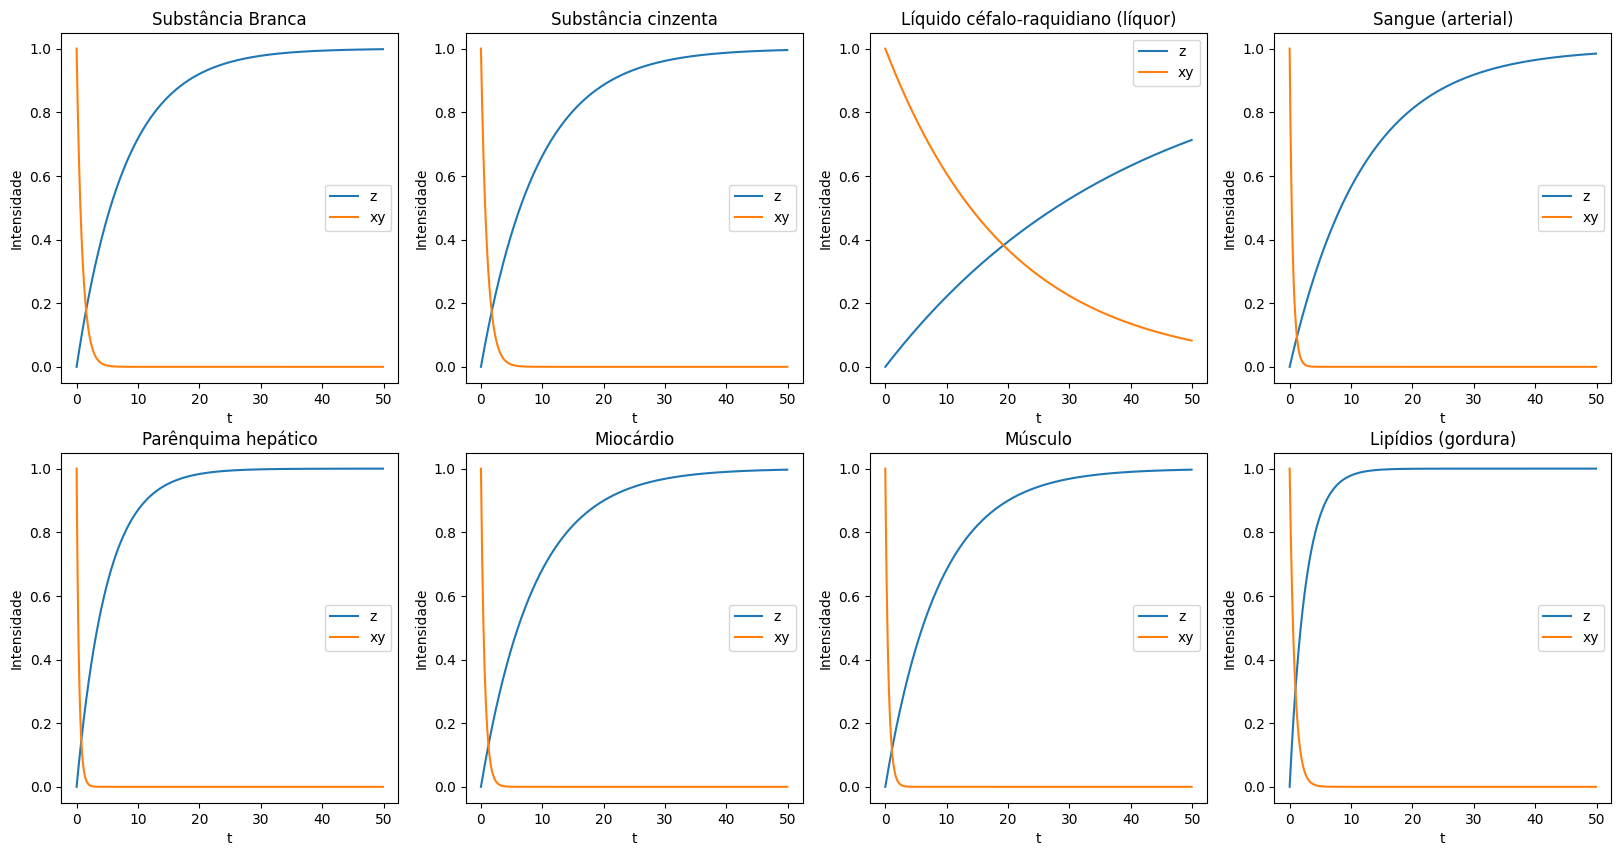

In [89]:
plt.figure(figsize = (20,10))
for i in range(8):
    plt.subplot(241 + i)
    plt.title(titles[i])
    plt.xlabel('t')
    plt.ylabel('Intensidade')
    plt.plot(t_a[i], M_z[i], label = 'z')
    plt.plot(t_a[i], M_xy[i], label = 'xy')
    plt.legend()

plt.show()
    

Now, adding the oscillatory term, with frequency corresponding to the Larmor frequency of a proton under a $1 \ T$ field:

In [90]:
z = 1j
gamma = 42.58*10e6
B_0 = 1

w = gamma*B_0

f = np.exp(z*w*t)


In [97]:
Mz_i = (M_z).real

M_xy_i = (M_xy*f).real

We get:

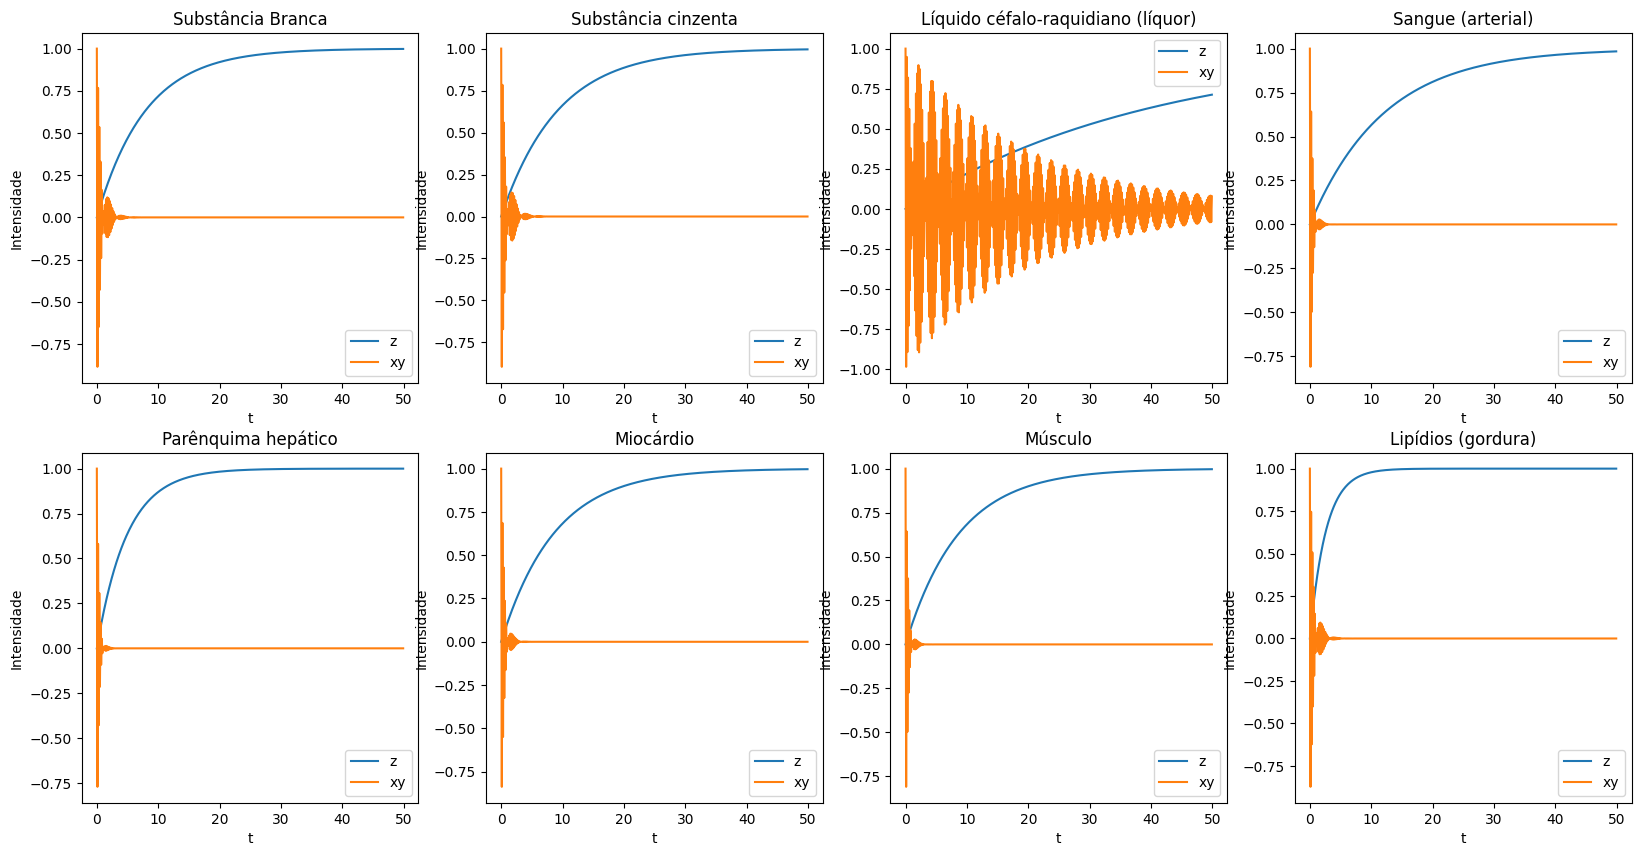

In [98]:
plt.figure(figsize = (20,10))
for i in range(8):
    plt.subplot(241 + i)
    plt.title(titles[i])
    plt.xlabel('t')
    plt.ylabel('Intensidade')
    plt.plot(t_a[i], Mz_i[i], label = 'z')
    plt.plot(t_a[i], M_xy_i[i], label = 'xy')
    plt.legend()

plt.show()